<a href="https://colab.research.google.com/github/KSY1526/myblog/blob/master/_notebooks/2022-06-01-dacon_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "[SSUDA] 트랜스포머 실습하기 with 데이콘 코드 유사성 대회"
- author: Seong Yeon Kim 
- categories: [SSUDA, transformer, Deep Learning, natural language, DACON]

# 구글 드라이브 연동 및 패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


구글 드라이브와 연동해 파일을 불러옵니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/coding/'

train = pd.read_csv(path + 'sample_train.csv')
test = pd.read_csv(path + 'test.csv')
sample_submission = pd.read_csv(path + 'sample_submission.csv')
train.head()

,code1,code2,similar
0,"flag = ""go""\ncnt = 0\nwhile flag == ""go"":\n ...",# Python 3+\n#--------------------------------...,1
1,"b, c = map(int, input().split())\n\nprint(b * c)",import numpy as np\n\nn = int(input())\na = np...,0
2,import numpy as np\nimport sys\nread = sys.std...,"N, M = map(int, input().split())\nif M%2 != 0:...",0
3,"b, c = map(int, input().split())\n\nprint(b * c)","n,m=map(int,input().split())\nh=list(map(int,i...",0
4,s=input()\nt=input()\nans=0\nfor i in range(le...,"import math\na,b,h,m=map(int,input().split())\...",0


필수 패키지를 불러오고 데이터를 불러옵니다.

In [ ]:
!pip install transformers knockknock

from knockknock import discord_sender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 48.3 MB/s 
     |████████████████████████████████| 596 kB 47.0 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 1.4 MB 45.6 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 511 kB 70.2 MB/s 
     |████████████████████████████████| 48 kB 6.2 MB/s 
     |████████████████████████████████| 4.0 MB 45.9 MB/s 
     |████████████████████████████████| 404 kB 68.7 MB/s 
     |████████████████████████████████| 428 kB 23.9 MB/s 
     |████████████████████████████████| 58 kB 7.3 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
  Attempting uninstall: tornado
    Found exis

디스코드 서버와 연동하는 패키지를 다운로드 합니다. 사용법은 밑에서 설명합니다.

In [ ]:
print(train.shape)
print(test.shape)

(17970, 3)
(179700, 3)


# BOW 방법

In [ ]:
tem = CountVectorizer()
tem.fit(train['code1'])
tem.vocabulary_

{'flag': 4281,
 'go': 4603,
 'cnt': 2991,
 'while': 10034,
 'int': 5201,
 'input': 5137,
 'if': 4958,
 'stop': 9031,
 'else': 3928,
 'print': 7773,
 'case': 2833,
 'str': 9035,
 'map': 6152,
 'split': 8907,
 'import': 5023,
 'numpy': 7117,
 'as': 2180,
 'np': 7004,
 'sys': 9222,
 'read': 8108,
 'stdin': 9007,
 'buffer': 2639,
 'readline': 8129,
 'from': 4363,
 'numba': 7090,
 'njit': 6906,
 'def': 3485,
 'getinputs': 4546,
 'cs': 3257,
 'array': 2158,
 'int32': 5203,
 '26': 725,
 'reshape': 8212,
 'return': 8247,
 'i8': 4903,
 'i4': 4898,
 'cache': 2753,
 'true': 9668,
 '_compute_score1': 1572,
 'out': 7356,
 'score': 8599,
 'last': 5725,
 'zeros': 10428,
 'for': 4327,
 'in': 5026,
 'range': 8075,
 'len': 5793,
 'sum': 9115,
 'step1': 9011,
 'max_score': 6252,
 '10000000': 225,
 'best_i': 2428,
 'append': 2103,
 'pop': 7622,
 'output': 7362,
 'join': 5476,
 'astype': 2199,
 'tolist': 9583,
 'ans': 2035,
 'min': 6387,
 'abs': 1835,
 'rev': 8254,
 'false': 4161,
 'list': 5884,
 'mini': 6

CountVectorizer 함수로 입력되는 단어를 숫자와 매칭시킵니다.

https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html

In [ ]:
tem.transform([train['code1'][0]]).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tem.transform([train['code1'][0]]).toarray().shape

(1, 12552)

code1에 있는 단어 중 단어 집합에 해당하는 단어가 있는 경우에만 1을 출력하는 백터로 변환합니다.

In [ ]:
cosine_similarity(tem.transform([train['code1'][0]]), tem.transform([train['code2'][0]]))

array([[0.32871913]])

In [ ]:
train['similar'][0]

1

cosine_similarity 함수는 위에서 원-핫 인코딩 형태로 변환 된 단어들을 보고 유사성 여부를 판단합니다.

0.32로 유사성이 일부 있는 것으로 보이는데 실제 두 코드는 유사한 코드 입니다.

https://wikidocs.net/24603

In [ ]:
class BaselineModel():
    def __init__(self, threshold = 0.5):
        super(BaselineModel, self).__init__()
        self.threshold = threshold
        self.vectorizer = CountVectorizer()

    def fit(self, code1, code2):
        self.vectorizer.fit(code1)
        self.vectorizer.fit(code2)
        print('Done.')
    
    def predict_proba(self, code1, code2):
        code1_vecs = self.vectorizer.transform(code1)
        code2_vecs = self.vectorizer.transform(code2)

        preds = []

        for code1_vec, code2_vec in zip(code1_vecs, code2_vecs):
            preds.append(cosine_similarity(code1_vec, code2_vec))
        
        preds = np.reshape(preds, len(preds))
        print('Done.')

        return preds
    
    @discord_sender(webhook_url="https://discordapp.com/api/webhooks/9810o3fUYfVz2jWg7if")
    def predict(self, code1, code2):
        preds = self.predict_proba(code1, code2)
        preds = np.where(preds > self.threshold, 1, 0)

        return preds

트레인 데이터를 이용해 단어 집합을 만들고 테스트 데이터를 원-핫 인코딩 방식으로 변환합니다.

다음으로 cosine_similarity 함수를 사용해 원-핫 인코딩 벡터의 유사성을 검정해 임개값보다 크면 1, 작으면 0을 출력합니다.

딥러닝이라기 보다 단순한 컴퓨터 노가다에 가깝죠. 베이스라인으로 사용하기에 좋은 모델인 것 같습니다.

참고로 함수 위에 @discord_sender(webhook_url = '디스코드 웹 서버')를 입력하면 함수 시작하는 시점, 끝나는 시점이 디스코드 알림으로 옵니다.

학습하는데 오래걸리는 딥러닝 모델에 경우, 핸드폰으로 알림을 받을 수 있으니 알아두면 정말 좋은 기능이 될 것 같아요.

In [ ]:
model = BaselineModel(threshold = 0.4)
model.fit(train['code1'], train['code2'])

Done.


In [ ]:
preds = model.predict(test['code1'], test['code2'])

Done.


In [ ]:
(train['similar']).mean()

0.5011129660545354

In [ ]:
(preds).mean()

0.5092877017250974

threshold = 0.5일때 약 0.3, threshold = 0.3일때 약 0.7, threshold = 0.4일때 약 0.5를 가지는 것을 확인했습니다.

실제 트레인 데이터의 유사성이 1일 확률이 0.5에 가까움으로 임계값은 0.4로 잡겠습니다.

(대회는 ACCURACY 기준)

In [ ]:
predtrain = model.predict(train['code1'], train['code2'])
(predtrain == train['similar']).mean()

Done.


0.7125765164162493

임계값 0.4를 사용해 트레인 데이터를 예측에 사용하면 약 0.71에 정확성을 보입니다.

사실 거창한 딥러닝을 사용하지 않아도 쓰는 단어가 얼추 비슷하면 유사성 판단은 어느정도는 하는 것을 알 수 있습니다.

In [ ]:
sample_submission['similar'] = preds
sample_submission.to_csv('dacon_codes.csv', index = False)
# 결과 : 0.688

# huggingface 툴 사용

In [ ]:
# !unzip -qq /content/drive/MyDrive/coding/open.zip
!pip install transformers
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 10.1 MB/s 
     |████████████████████████████████| 140 kB 10.9 MB/s 
     |████████████████████████████████| 1.1 MB 12.0 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 127 kB 28.0 MB/s 
     |████████████████████████████████| 271 kB 28.3 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 144 kB 29.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully u

In [ ]:
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import load_dataset, load_metric
import torch

#device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = "klue/bert-base" # 'microsoft/graphcodebert-base'
MAX_LEN = 256
dataset = load_dataset('csv', data_files = path+'sample_train.csv')['train']
tokenizer = AutoTokenizer.from_pretrained(model)

Using custom data configuration default-e6c40baceae51225
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-e6c40baceae51225/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

https://huggingface.co/klue/bert-base/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpjiwfrzjb


Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

storing https://huggingface.co/klue/bert-base/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/f8f71eb411bb03f57b455cfb1b4e04ae124201312e67a3ad66e0a92d0c228325.78871951edcb66032caa0a9628d77b3557c23616c653dacdb7a1a8f33011a843
creating metadata file for /root/.cache/huggingface/transformers/f8f71eb411bb03f57b455cfb1b4e04ae124201312e67a3ad66e0a92d0c228325.78871951edcb66032caa0a9628d77b3557c23616c653dacdb7a1a8f33011a843
https://huggingface.co/klue/bert-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp3hhezuli


Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

storing https://huggingface.co/klue/bert-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
creating metadata file for /root/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
loading configuration file https://huggingface.co/klue/bert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
Model config BertConfig {
  "_name_or_path": "klue/bert-base",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.0

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

storing https://huggingface.co/klue/bert-base/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/1a36e69d48a008e522b75e43693002ffc8b6e6df72de7c53412c23466ec165eb.085110015ec67fc02ad067f712a7c83aafefaf31586a3361dd800bcac635b456
creating metadata file for /root/.cache/huggingface/transformers/1a36e69d48a008e522b75e43693002ffc8b6e6df72de7c53412c23466ec165eb.085110015ec67fc02ad067f712a7c83aafefaf31586a3361dd800bcac635b456
https://huggingface.co/klue/bert-base/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp5jkm4tpg


Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

storing https://huggingface.co/klue/bert-base/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/310a974e892b181d75eed58b545cc0592d066ae4ef35cc760ea92e9b0bf65b3b.74f7933572f937b11a02b2cfb4e88a024059be36c84f53241b85b1fec49e21f7
creating metadata file for /root/.cache/huggingface/transformers/310a974e892b181d75eed58b545cc0592d066ae4ef35cc760ea92e9b0bf65b3b.74f7933572f937b11a02b2cfb4e88a024059be36c84f53241b85b1fec49e21f7
https://huggingface.co/klue/bert-base/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp34fn1p8b


Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

storing https://huggingface.co/klue/bert-base/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/aeaaa3afd086a040be912f92ffe7b5f85008b744624f4517c4216bcc32b51cf0.054ece8d16bd524c8a00f0e8a976c00d5de22a755ffb79e353ee2954d9289e26
creating metadata file for /root/.cache/huggingface/transformers/aeaaa3afd086a040be912f92ffe7b5f85008b744624f4517c4216bcc32b51cf0.054ece8d16bd524c8a00f0e8a976c00d5de22a755ffb79e353ee2954d9289e26
loading file https://huggingface.co/klue/bert-base/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/1a36e69d48a008e522b75e43693002ffc8b6e6df72de7c53412c23466ec165eb.085110015ec67fc02ad067f712a7c83aafefaf31586a3361dd800bcac635b456
loading file https://huggingface.co/klue/bert-base/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/310a974e892b181d75eed58b545cc0592d066ae4ef35cc760ea92e9b0bf65b3b.74f7933572f937b11a02b2cfb4e88a024059be36c84f53241b85b1fec49e21f7
loading file https://hugg

load_dataset 함수 : csv 파일을 가공하기 쉬운 데이터 셋으로 만들어줍니다.

AutoTokenizer내 from_pretrained 함수에서 프리트레인 모델 이름만 입력하면 자동으로 토크나이징이 됩니다.

In [ ]:
def example_fn(examples):
    outputs = tokenizer(examples['code1'], examples['code2'], padding = True, max_length = MAX_LEN, truncation = True)

    if 'similar' in examples:
        outputs['labels'] = examples['similar']
    
    return outputs


dataset = dataset.map(example_fn, remove_columns = ['code1', 'code2', 'similar'])

dataset = dataset.train_test_split(0.1)
dataset

  0%|          | 0/17970 [00:00<?, ?ex/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 16173
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1797
    })
})

dataset 내 map 함수 : 원소별로 입력된 함수를 적용합니다.

dataset 내 train_test_split 함수 : 트레인-테스트 데이터 셋으로 분할한 딕셔너리를 만듭니다.

In [ ]:
_collator = DataCollatorWithPadding(tokenizer = tokenizer) # 아래 사진으로 해당함수 설명
_metric = load_metric('glue', 'sst2') # 측정함수도 huggingface 내 존재
# https://huggingface.co/docs/datasets/v1.0.1/loading_metrics.html 참고문서

def metric_fn(p): # 측정함수
    preds, labels = p
    output = _metric.compute(references = labels, predictions = np.argmax(preds, axis = -1))
    return output

model = BertForSequenceClassification.from_pretrained(model)

args = TrainingArguments(
    'runs/',
    per_device_train_batch_size = 32,
    num_train_epochs = 3,
    do_train = True,
    do_eval = True,
    save_strategy = 'epoch',
    logging_strategy = 'epoch',
    evaluation_strategy = 'epoch',
)

loading configuration file https://huggingface.co/klue/bert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

https://huggingface.co/klue/bert-base/resolve/main/pytorch_model.bin not found in cache or force_download set to True, downloading to /root/.c

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

storing https://huggingface.co/klue/bert-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/05b36ee62545d769939a7746eca739b844a40a7a7553700f110b58b28ed6a949.7cb231256a5dbe886e12b902d05cb1241f330d8c19428508f91b2b28c1cfe0b6
creating metadata file for /root/.cache/huggingface/transformers/05b36ee62545d769939a7746eca739b844a40a7a7553700f110b58b28ed6a949.7cb231256a5dbe886e12b902d05cb1241f330d8c19428508f91b2b28c1cfe0b6
loading weights file https://huggingface.co/klue/bert-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/05b36ee62545d769939a7746eca739b844a40a7a7553700f110b58b28ed6a949.7cb231256a5dbe886e12b902d05cb1241f330d8c19428508f91b2b28c1cfe0b6
Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cl

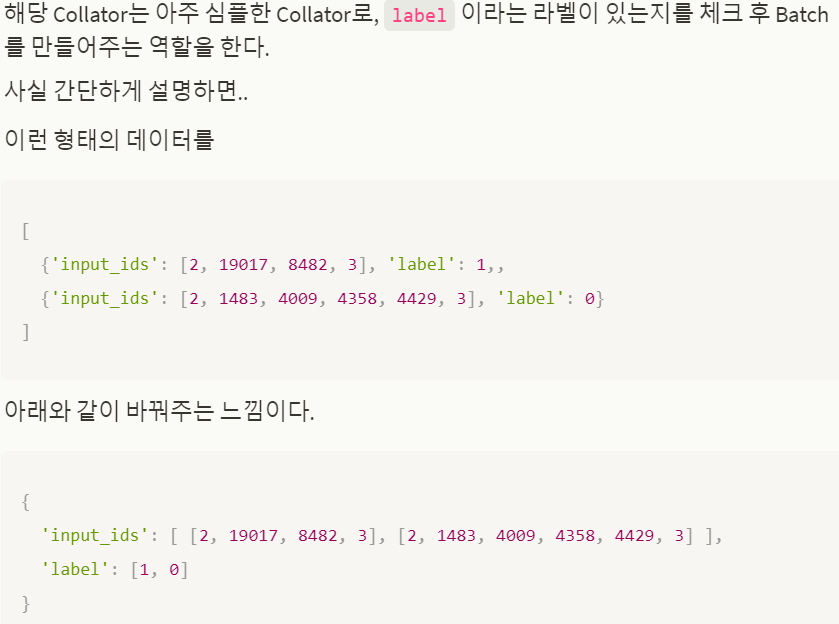

In [ ]:
trainer = Trainer(
    model = model,
    args = args,
    data_collator = _collator,
    train_dataset = dataset['train'],
    eval_dataset = dataset['test'],
    tokenizer = tokenizer,
    compute_metrics = metric_fn
)

@discord_sender(webhook_url="https://discordapp.com/api/webhooks/98101yo3fUYfVz2jWg7if")
def tem():
    trainer.train()

tem()

***** Running training *****
  Num examples = 16173
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1518


Epoch,Training Loss,Validation Loss,Accuracy
1,0.304100,0.188209,0.920423
2,0.117700,0.130098,0.960490
3,0.036200,0.093612,0.978297


***** Running Evaluation *****
  Num examples = 1797
  Batch size = 8
Saving model checkpoint to runs/checkpoint-506
Configuration saved in runs/checkpoint-506/config.json
Model weights saved in runs/checkpoint-506/pytorch_model.bin
tokenizer config file saved in runs/checkpoint-506/tokenizer_config.json
Special tokens file saved in runs/checkpoint-506/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1797
  Batch size = 8
Saving model checkpoint to runs/checkpoint-1012
Configuration saved in runs/checkpoint-1012/config.json
Model weights saved in runs/checkpoint-1012/pytorch_model.bin
tokenizer config file saved in runs/checkpoint-1012/tokenizer_config.json
Special tokens file saved in runs/checkpoint-1012/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1797
  Batch size = 8
Saving model checkpoint to runs/checkpoint-1518
Configuration saved in runs/checkpoint-1518/config.json
Model weights saved in runs/checkpoint-1518/pytorch_model.bin
t

In [ ]:
test_dataset = load_dataset('csv', data_files = path+'test.csv')['train']
test_dataset = test_dataset.map(example_fn, remove_columns = ['code1', 'code2'])

predictions = trainer.predict(test_dataset)

sample_submission['similar'] = np.argmax(predictions.predictions, axis = -1)
sample_submission.to_csv('dacon_codes2.csv', index = False)
# 결과 : 0.787

Using custom data configuration default-6692cc772abf77e3
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-6692cc772abf77e3/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/179700 [00:00<?, ?ex/s]

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: pair_id. If pair_id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 179700
  Batch size = 8


In [ ]:
predictions.predictions

array([[ 4.3174033, -3.926483 ],
       [-4.4421177,  4.0519753],
       [-4.2312655,  3.7239847],
       ...,
       [ 2.8522801, -2.7274592],
       [-4.4676304,  4.039054 ],
       [ 2.7921119, -2.535519 ]], dtype=float32)

In [ ]:
sample_submission['similar'].mean()

0.6730996104618809